In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Overview

- Buidling machine learning application to predict oral temperature 'aveOralF' and 'aveOralM'
- Build model to classify fever and non-fever from the respective data

# 1. Download and import the dataset 

In [142]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [143]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
print(type(infrared_thermography_temperature))

<class 'ucimlrepo.dotdict.dotdict'>


In [147]:
# extract features and targets from dotdict import  
data = infrared_thermography_temperature.data.features

target_aveOralF = infrared_thermography_temperature.data.targets['aveOralF']
target_aveOralM = infrared_thermography_temperature.data.targets['aveOralM']

# convert to pandas dataframe 
df = pd.DataFrame(data)
df['aveOralF'] = target_aveOralF
df['aveOralM'] = target_aveOralM

df.head()
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

# 2. Data Preprocessing

- 2 missing value in 'Distance'
- 'Gender', 'Age', 'Ethicity' is non numeric

## 2.1 Handle non-numeric entries 

In [ ]:
# encoding all none float64 columns
df = pd.get_dummies(df, columns=['Gender','Age','Ethnicity'], drop_first=True, dtype='float64')
print(df.columns)
print(df.info())

## 2.2 Handle missing values 

In [149]:
# impute the missing values with mean 
distance_mean = df['Distance'].mean()
print(distance_mean)
df['Distance'] = df['Distance'].fillna(df['Distance'].mean())

# check for all missing values again, in 'Distance' and df
print(df['Distance'].isnull().sum())
# print(df.isnull().sum())

0.7297838899803536
0


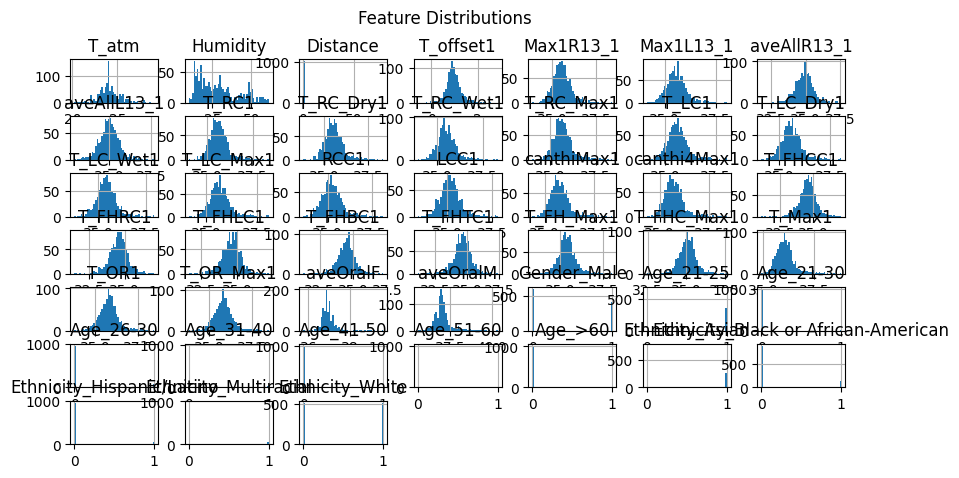

In [154]:
# visualising the dataset
df.hist(bins=50, figsize=(10, 5))
plt.suptitle('Feature Distributions')
plt.show()

In [155]:
print(df.columns)

Index(['T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1',
       'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1',
       'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1',
       'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1',
       'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1',
       'T_OR_Max1', 'aveOralF', 'aveOralM', 'Gender_Male', 'Age_21-25',
       'Age_21-30', 'Age_26-30', 'Age_31-40', 'Age_41-50', 'Age_51-60',
       'Age_>60', 'Ethnicity_Asian', 'Ethnicity_Black or African-American',
       'Ethnicity_Hispanic/Latino', 'Ethnicity_Multiracial',
       'Ethnicity_White'],
      dtype='object')


# 3. Model & model parameters Selection

## 3.1 Split train test data 80-20

In [188]:
x = df.drop(['aveOralF', 'aveOralM'], axis=1)

y_aof = df['aveOralF'] # target aveOralF
y_aom = df['aveOralM'] # target aveOralM

x_train, x_test, y_train_f, y_test_f, y_train_m, y_test_m = train_test_split(x, y_aof, y_aom, test_size=0.2, random_state=42)

# Check shapes
print(x_train.shape, y_train_f.shape, y_test_f.shape)
print(x_train.shape, y_train_m.shape, y_test_m.shape)

(816, 43) (816,) (204,)
(816, 43) (816,) (204,)


## 3.2 Models evaluation with cross_val_score 
- Obtaining MAE and MSE scores from 3 models, on 2 target set to determent the best model for the regression task
- The 3 models are RandomForestRegressor, LinearRegression, DecisionTreeRegressor

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [198]:
rf_f_score = cross_val_score(RandomForestRegressor(random_state=42), x_train, y_train_f, cv=5, scoring='neg_mean_absolute_error')
lg_f_score = cross_val_score(LinearRegression(), x_train, y_train_f, cv=5, scoring='neg_mean_absolute_error')
dt_f_score = cross_val_score(DecisionTreeRegressor(),x_train, y_train_f, cv=5, scoring='neg_mean_absolute_error')

rf_f_score2 = cross_val_score(RandomForestRegressor(random_state=42), x_train, y_train_f, cv=5, scoring='neg_mean_squared_error')
lg_f_score2 = cross_val_score(LinearRegression(), x_train, y_train_f, cv=5, scoring='neg_mean_squared_error')
dt_f_score2 = cross_val_score(DecisionTreeRegressor(),x_train, y_train_f, cv=5, scoring='neg_mean_squared_error')
    
rf_m_score = cross_val_score(RandomForestRegressor(random_state=42), x_train, y_train_m, cv=5, scoring='neg_mean_absolute_error')
lg_m_score = cross_val_score(LinearRegression(), x_train, y_train_m, cv=5, scoring='neg_mean_absolute_error')
dt_m_score = cross_val_score(DecisionTreeRegressor(),x_train, y_train_m, cv=5, scoring='neg_mean_absolute_error')

rf_m_score2 = cross_val_score(RandomForestRegressor(random_state=42), x_train, y_train_m, cv=5, scoring='neg_mean_squared_error')
lg_m_score2 = cross_val_score(LinearRegression(), x_train, y_train_m, cv=5, scoring='neg_mean_squared_error')
dt_m_score2 = cross_val_score(DecisionTreeRegressor(),x_train, y_train_m, cv=5, scoring='neg_mean_squared_error')
# cross-validation results
print("--- MAE ON TARGET F")
print("random forest aveOralF: ", -rf_f_score.mean())
print("linear regression aveOralF: ", -lg_f_score.mean())
print("tree regression aveOralF: ", -dt_f_score.mean())
print("--- MSE ON TARGET F")
print("random forest aveOralF: ", -rf_f_score2.mean())
print("linear regression aveOralF: ", -lg_f_score2.mean())
print("tree regression aveOralF: ", -dt_f_score2.mean())
print("--- MAE ON TARGET M")
print("random forest aveOralM: ", -rf_m_score.mean())
print("linear regression aveOralM: ", -lg_m_score.mean())
print("tree regression aveOralM: ", -dt_m_score.mean())
print("--- MSE ON TARGET F")
print("random forest aveOralF: ", -rf_m_score2.mean())
print("linear regression aveOralF: ", -lg_m_score2.mean())
print("tree regression aveOralF: ", -dt_m_score2.mean())

--- MAE ON TARGET F
random forest aveOralF:  0.17390059479275768
linear regression aveOralF:  0.21087866002379094
tree regression aveOralF:  0.2593629358072721
--- MSE ON TARGET F
random forest aveOralF:  0.05882919840453391
linear regression aveOralF:  0.5326829946436074
tree regression aveOralF:  0.12556868172976204
--- MAE ON TARGET M
random forest aveOralM:  0.19644964836151407
linear regression aveOralM:  0.23750962389609365
tree regression aveOralM:  0.27908499177016316
--- MSE ON TARGET F
random forest aveOralF:  0.06598988597560963
linear regression aveOralF:  0.5406102371439074
tree regression aveOralF:  0.12150884707466703


- for both targets, the Random Forest Regressor model performs the best (lowest MAE and MSE score)

## 3.3 Hyperparameter tuning with the chosen model Random Forest Regressor 
- using GridSearchCV to find the best performing parameters set for the chosen model 

In [200]:
from sklearn.model_selection import GridSearchCV

In [219]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_leaf': [1, 2, 4],  
    'min_samples_split': [2, 5, 10], 
    'max_features': ['sqrt', 'log2'], 
    'bootstrap': [True, False] 
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                        param_grid=param_grid, 
                        cv=5, 
                        n_jobs=-1,  
                        verbose=0, 
                        scoring='neg_mean_absolute_error')

In [240]:
grid_search.fit(x_train, y_train_f)
print("best params: ", grid_search.best_params_)
print("Best mae: ", grid_search.best_score_)

# EXTRACT MODEL (aveOralF)
best_rf_aof = grid_search.best_estimator_

best params:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best mae:  -0.1695221930996861


In [256]:
grid_search.fit(x_train, y_train_m)
print("best params: ", grid_search.best_params_)
print("Best mae: ", grid_search.best_score_)

# EXTRACT MODEL (aveOralM)
best_rf_aom = grid_search.best_estimator_

best params:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best mae:  -0.19844579673899815


## 3.4.1 Train, predict and evaluate model for 'aveOralF'

In [274]:
print(best_rf_aof.get_params())
print('---------------------------------------------')
best_rf_aof.fit(x_train, y_train_f)
y_predict_f = best_rf_aof.predict(x_test)

mae = mean_absolute_error(y_test_f, y_predict_f)
mse = mean_squared_error(y_test_f, y_predict_f)
print("random forest on aveOralF MAE: " + str(mae))
print("random forest on aveOralF MSE: " + str(mse))

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
---------------------------------------------
random forest on aveOralF MAE: 0.16994641337452812
random forest on aveOralF MSE: 0.05426645936780824


## 3.5.2 Train, predict and evaluate model for 'aveOralM'

In [276]:
print(best_rf_aom.get_params())
print('---------------------------------------------')
best_rf_aom.fit(x_train, y_train_m)
y_predict_f = best_rf_aof.predict(x_test)

mae = mean_absolute_error(y_test_m, y_predict_m)
mse = mean_squared_error(y_test_m, y_predict_m)
print("random forest on aveOralM MAE: " + str(mae))
print("random forest on aveOralM MSE: " + str(mse))

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
---------------------------------------------
random forest on aveOralM MAE: 0.17815196056176674
random forest on aveOralM MSE: 0.054297877967004936
